In [42]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [43]:
df = pd.read_csv('Manufacturing Dataset.csv')

In [44]:
df.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


🏭 PRODUCTION OUTPUT ANALYSIS

In [45]:
df.columns

Index(['Production ID', 'Date', 'Product Type', 'Machine ID', 'Shift',
       'Units Produced', 'Defects', 'Production Time Hours',
       'Material Cost Per Unit', 'Labour Cost Per Hour',
       'Energy Consumption kWh', 'Operator Count', 'Maintenance Hours',
       'Down time Hours', 'Production Volume Cubic Meters', 'Scrap Rate',
       'Rework Hours', 'Quality Checks Failed', 'Average Temperature C',
       'Average Humidity Percent'],
      dtype='object')

In [46]:
total_units_produced = df['Units Produced'].sum()

In [47]:
total_units_produced

375113

In [48]:
# average units produced per run
average_per_run = df["Units Produced"].mean()

print("Average units produced per run:", average_per_run)

Average units produced per run: 125.03766666666667


In [51]:
# highest output by product type
highest_output_by_product = df.groupby("Product Type")["Units Produced"].sum().sort_values(ascending=False)

In [53]:
highest_output_by_product.to_frame()

,Units Produced
Product Type,
Automotive,82557
Textiles,76407
Appliances,76242
Furniture,70185
Electronics,69722


Production Time

In [15]:
# average production time per run (in hours)
average_production_time = df["Production Time Hours"].mean()

print("Average production time per run (hours):", average_production_time)

Average production time per run (hours): 12.577696666666668


Shift Wise Performance

In [20]:
df.groupby('Shift')[["Units Produced"]].sum()

,Units Produced
Shift,
Day,122194
Night,125147
Swing,127772


In [30]:
df['Machine ID'].nunique()

20

In [24]:
df.groupby('Machine ID')[["Units Produced"]].sum().sort_values(by="Units Produced",ascending=False)

,Units Produced
Machine ID,
1,22619
10,22549
4,21668
7,21351
2,20647
8,20458
11,19685
17,19078
13,18276


Cost Analysis

In [31]:


# average material cost per unit by product type
material_cost_vs_product = (
    df.groupby("Product Type")["Material Cost Per Unit"]
      .mean()
      .sort_values(ascending=False)
)

print(material_cost_vs_product)


Product Type
Furniture      31.198713
Electronics    30.853438
Automotive     30.112543
Appliances     29.787041
Textiles       29.186755
Name: Material Cost Per Unit, dtype: float64


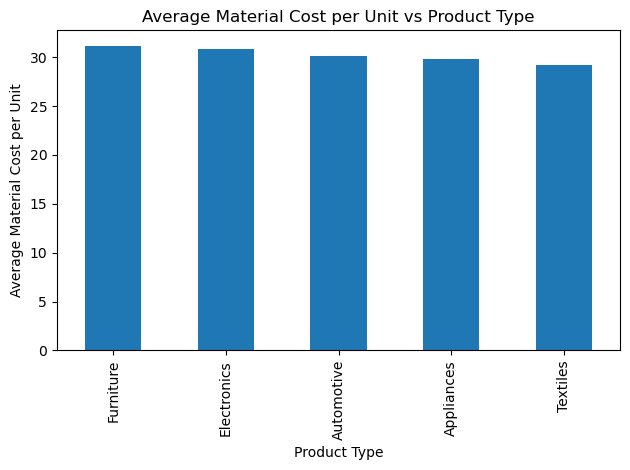

In [32]:
# (optional) visualization
import matplotlib.pyplot as plt

material_cost_vs_product.plot(kind="bar")
plt.title("Average Material Cost per Unit vs Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Material Cost per Unit")
plt.tight_layout()
plt.show()


Labour and Energy Cost

In [34]:
df.groupby('Shift')[['Labour Cost Per Hour','Energy Consumption kWh']].sum()

,Labour Cost Per Hour,Energy Consumption kWh
Shift,,
Day,22365.10,293523.42
Night,22859.65,305591.69
Swing,22704.06,300571.18


Quality Analysis

In [37]:
df.groupby('Product Type')['Defects'].mean()

Product Type
Appliances     4.558394
Automotive     4.626316
Electronics    4.586667
Furniture      4.742633
Textiles       4.557377
Name: Defects, dtype: float64

In [38]:
df["Scrap Rate (%)"] = df["Scrap Rate"] * 100

In [39]:
df.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,Scrap Rate (%)
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2,4.8
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9,3.0
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1,2.6
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8,3.6
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9,2.0


In [40]:
avg_scrap_rate = df["Scrap Rate (%)"].mean()

In [41]:
avg_scrap_rate

3.0255